# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [17]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]

np.size(X)


15000

#### Régression linéaire avec régularisation Lasso ...


In [19]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


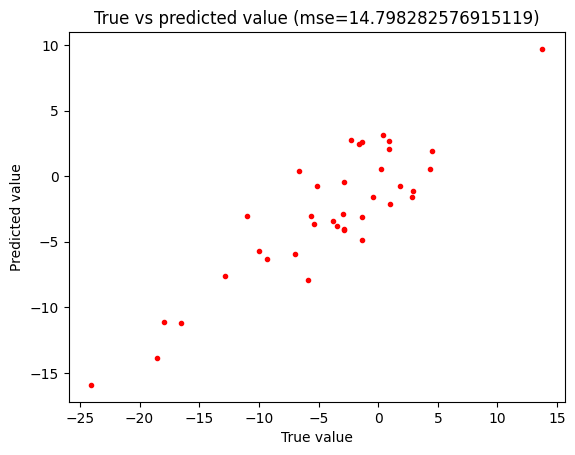

In [20]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



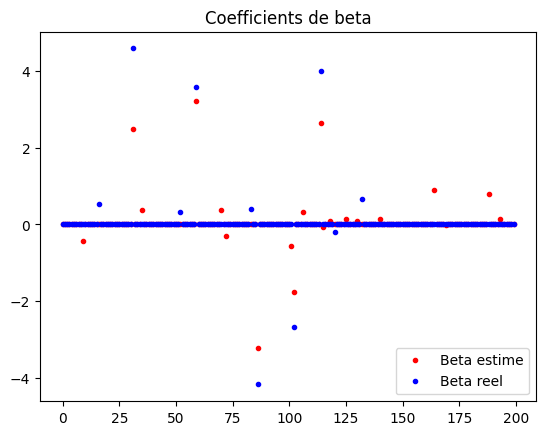

In [21]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

- Avec 1000 observations, les résultats sont vraiment bon et les facteurs ayant un impact sont bien identifiés, avec pratiquement aucun faux positif
- Pour 100 et 75 observations, les résultats sont raisonablement bon, et les principaux facteurs sont identifiés, avec cependant quelques faux positifs.
- En dessous de 75 observations, on a du mal a avoir de bonnes predictions et estimer les bons facteurs.




### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [10]:
from sklearn.model_selection import KFold

#-> 1ere passe : estimtion de l'echelle du alpha optimal

NB_folds=8

for alpha in [0.001,0.01,0.1,1.,10.]:
  sum_mse_scores=0.
  kf = KFold(n_splits=NB_folds)
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
    

  print(alpha," mean MSE: ",sum_mse_scores/NB_folds)

# Meilleur score obtenu pour alpha=0.1

0.001  mean MSE:  22.669451483667068
0.01  mean MSE:  14.279992374168355
0.1  mean MSE:  11.00098340640826
1.0  mean MSE:  15.32789734007311
10.0  mean MSE:  75.72210367055503


/home/tom_duq/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+00, tolerance: 5.140e-01
  model = cd_fast.enet_coordinate_descent(
/home/tom_duq/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.122e-01, tolerance: 4.899e-01
  model = cd_fast.enet_coordinate_descent(
/home/tom_duq/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

In [9]:
#-> 2eme passe : estimation plus fine du alpha optimal

for alpha in [0.025,0.05,0.1,0.2,0.4,0.8]:
  sum_mse_scores=0.
  kf = KFold(n_splits=NB_folds)
  for train, test in kf.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso

  print(alpha," mean MSE: ",sum_mse_scores/NB_folds)

# Meilleur score obtenu pour alpha=0.2


0.025  mean MSE:  13.614445436477776
0.05  mean MSE:  12.904579116327195
0.1  mean MSE:  11.00098340640826
0.2  mean MSE:  9.203701952058172
0.4  mean MSE:  9.212862708317793
0.8  mean MSE:  12.327123036946238


In [ ]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [ ]:


from sklearn.linear_model import LinearRegression

#...



In [ ]:
import nbformat as nbf

# Nom du fichier HTML de correction
html_file = "Exo7_RegressionMultipleReg_correc.html"
notebook_file = "Exo7"

# Lire le contenu HTML
with open(html_file, "r", encoding="utf-8") as f:
    html_content = f.read()

# Créer un notebook vide
nb = nbf.v4.new_notebook()

# Ajouter le HTML dans une cellule Markdown
nb.cells.append(nbf.v4.new_markdown_cell(html_content))

# Sauvegarder le notebook
with open(notebook_file, "w", encoding="utf-8") as f:
    nbf.write(nb, f)

print(f"Notebook créé : {notebook_file}")


Notebook créé : Exo7_RegressionMultipleReg_correc.ipynb
